# Анонимные функции и встроенные функции

Создайте функцию double, которая принимает на вход число и возвращает его удвоенное значение. 
Например, подадим на вход 4 – получим 8.

In [1]:
def double(num): 
    # создаем классическую функцию 
    return num * 2 #возвращаем удвоенное значение

number = double(8) #вызываем функцию double() с аргументом 8
print(number) #печатаем на экран значение переменной 


16


In [2]:
number = lambda num: num * 2 #используем анонимную(лямбда) функцию
print(number(8)) #печатаем на экран значение переменной 


16


В программе хранится список из строк, представляющие собой натуральные числа. Необходимо найти строку с максимальным числовым значением. 

Исходный список не должен меняться. 

Например, для списка ['4', '23', '15', '8'] программа должна вывести  '23'


In [4]:
numbs = ['4', '23', '15', '8'] #объявляем список 
max_str = '0' #контрзначение для максимального числа в виде строки
for num in numbs: #перебираем строки из списка numbs
    if int(num) > int(max_str): #если текущее «число» больше
        max_str = num #обновляем значение переменной для максимума
print(max_str) #печатаем на экран максимальное значение

23


In [5]:
numbs = ['4', '23', '15', '8']
#ищем максимальное значение через генератор списков
max_str = max([int(num) for num in numbs]) # list comprehension
print(max_str) #печатаем максимальное значение на экран

23


In [6]:
numbs = ['4', '23', '15', '8']
#ищем максимальное значение через генератор списков
max_str = max(list(map(int, numbs))) # встроенная функция map
print(max_str) #печатаем максимальное значение на экран

23


In [7]:
numbs = ['4', '23', '15', '8']
#ищем максимальное значение через параметр key и lambda-функцию
max_str = max(numbs, key=lambda num: int(num)) # только 1 раз работает
print(max_str) #выводим на экран максимальное значение

23


In [9]:
# без преобразования будет ошибка

numbs = ['4', '23', '15', '8']
#ищем максимальное значение через параметр key и lambda-функцию
max_str = max(numbs) # только 1 раз работает
max_str_right = max(numbs, key=int) # только 1 раз работает
print(max_str) #выводим на экран максимальное значение
print(max_str_right) #выводим на экран максимальное значение, результат верный

8
23


```lambda num: int(num)```

```lambda num: int(num) if type(x) == 'str' else num```

num - числа в формате string
int(num) или выход функции - это преобразованное число

```
def to_int(num: str) -> int: 
    if num.isdigit():
        return num
    return int(num)
```

In [ ]:
numbs = ['4', '23', '15', '8', 'abc']

try:
    max_num = max(numbs, key=int)
except ValueError:
    print("Ошибка: в списке содержатся недопустимые значения")
else:
    print(f"Максимальное число: {max_num}")

In [12]:
numbers = [num for num in range(20)]
squared_numbers = list(map(
    lambda numb: (lambda inner_numb: inner_numb ** 2)(numb), 
    numbers
    ))
print(squared_numbers) # несколько вложений и сложно выглядит (если вам самим нужно разбираться), то преобразуем в обычную функцию

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


In [16]:
# берется элемент из первого списка и возводится в степень, равную элементу из второго списка на такой же позиции

base = [1, 2, 5, 6] #список с основаниями
exp = [2, 3, 4, 5] #список с показателями
#создаем lambda-функцию для возведения в степень
data = list(map(lambda x, y: x**y, base, exp)) # выход - список чисел, __code__.co_argscount - кол-во аргументов в сигнатуре
print(", ".join(map(str, data))) # , - separator строки, перепреобразованием сделаем строкой каждый элемент

1, 8, 625, 7776


In [18]:
# фильтрация списка строк

words = ['красный', 'синий', 'оранжевый', 'белый']
#указываем последовательность, из которой будем брать данные
long_words = list(filter(lambda line: len(line) > 5, words)) # фильтр по длине слова
print(long_words)


['красный', 'оранжевый']


In [19]:
# задача палиндромы
words = ['шалаш', 'кот', 'топот', 'бег']
pal_words = list(filter(lambda word: word == word[::-1], words))
print(pal_words)

['шалаш', 'топот']


# Вложенные функции

In [20]:
def double_odd_numbers(numbers):
    '''
    Функция для проверки на нечетность и удвоения числа
    
    Удвоить число при условии, что оно нечетное
    '''
        
    def is_odd(n):
        return n % 2 != 0
    
    # Функция для удвоения числа
    def double(n):
        return n * 2
    
    # Новый список, состоящий из удвоенных нечетных чисел
    result = [double(n) for n in numbers if is_odd(n)]
    
    return result

# Примеры использования
print(double_odd_numbers([1, 2, 3, 4, 5]))          # Вывод: [2, 6, 10]
print(double_odd_numbers([6, 8, 10, 2]))             # Вывод: []
print(double_odd_numbers([-43, 91, 932, 9201, 32, 93])) # Вывод: [-86, 182, 18402, 186]

[2, 6, 10]
[]
[-86, 182, 18402, 186]


In [21]:
def get_extensions(file_list):
    # Вспомогательная функция для получения расширения файла
    def _get_extension(filename):
        # Разделяем имя файла на части по точке
        parts = filename.split('.')
        # Если есть расширение, возвращаем его, иначе возвращаем пустую строку
        return parts[-1] if len(parts) > 1 else ''
    
    # Используем вспомогательную функцию для создания списка расширений
    return [_get_extension(file) for file in file_list]

# Примеры использования
print(get_extensions(["foo.txt", "bar.mp4", "python3"]))  # Вывод: ['txt', 'mp4', '']
print(get_extensions(["document.pdf", "image.jpeg", "archive"]))  # Вывод: ['pdf', 'jpeg', '']

['txt', 'mp4', '']
['pdf', 'jpeg', '']


In [25]:
# функция compute, которая принимает список функций и произвольное количество значений

def compute(functions, *values):
    '''
    :param functions: список функций
    :param *values: произвольное число значений 78, 9, 89, 7
    '''
    results = []
    
    for value in values:
        # Применяем все функции к текущему значению
        for func in functions:
            value = func(value)
        results.append(value)
    
    return results

# Примеры использования
def square(num):
    return num ** 2

def inc(num):
    return num + 1

def dec(num):
    return num - 1

print(compute([square, inc], 10))  # Вывод: [101]
print(compute([inc, square, dec], 10, 20, 30, 40))  # Вывод: [120, 440, 960, 1680]

def repeater(value, n=3):
    return str(value) * n

print(compute([dec, inc, square, repeater], 5, 7, 0, True))  
# Вывод: ['252525', '494949', '000', '111']

[101]
[120, 440, 960, 1680]
['252525', '494949', '000', '111']


In [33]:
# Фильт строк (аналог функции фильтр)

def filter_collection(filter_condition, collection):
    # wrapper
    # Определяем тип коллекции
    if isinstance(collection, list):
        # Фильтруем и возвращаем список
        return [item for item in collection if filter_condition(item)]
    elif isinstance(collection, tuple):
        # Фильтруем и возвращаем кортеж
        return tuple(item for item in collection if filter_condition(item))
    elif isinstance(collection, str):
        # Фильтруем и возвращаем строку
        return ''.join(item for item in collection if filter_condition(item))
    else:
        raise TypeError("Unsupported collection type")

# Примеры использования
def is_even(num):
    return num % 2 == 0

numbers = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
even_numbers = filter_collection(is_even, numbers)
print(even_numbers)  # Вывод: (2, 4, 6, 8, 10)

print(tuple(filter(is_even, numbers)))  # аналог

def is_positive(num):
    return num > 0

numbers = [-1, 2, -3, 4, 5, -6, 7, -8, -9, 10]
positive_numbers = filter_collection(is_positive, numbers)
print(positive_numbers)  # Вывод: [2, 4, 5, 7, 10]

print(list(filter(is_positive, numbers)))  # аналог

print(filter_collection(lambda x: x not in 'aeiou', 'I never heard those lyrics before'))  
# Вывод: I nvr hrd ths lyrcs bfr

print("".join(list(filter(lambda x: x not in 'aeiou', 'I never heard those lyrics before'))))  # аналог

(2, 4, 6, 8, 10)
(2, 4, 6, 8, 10)
[2, 4, 5, 7, 10]
[2, 4, 5, 7, 10]
I nvr hrd ths lyrcs bfr
I nvr hrd ths lyrcs bfr


In [38]:
from functools import reduce

# агрегация, reduce
def aggregation(func, sequence):
    # Начальное значение - первый элемент последовательности
    result = sequence[0]
    
    # Применяем функцию к каждому элементу последовательности начиная со второго
    for item in sequence[1:]:
        result = func(result, item)
    
    return result

# Примеры использования
def get_add(x, y):
    return x + y

print(aggregation(get_add, [5, 2, 4, 3, 5]))  # Вывод: 19
print(reduce(get_add, [5, 2, 4, 3, 5]))  # Вывод: 19

def get_max(x, y):
    return max(x, y)

print(aggregation(get_max, [1, 4, 5, 7, 6, 5, 8, 10]))  # Вывод: 10
print(reduce(get_max, [1, 4, 5, 7, 6, 5, 8, 10]))  # Вывод: 10

def get_min(x, y):
    return min(x, y)

print(aggregation(get_min, [9, 6, 7, 8, 5, 1, 2, 4]))  # Вывод: 1
print(reduce(get_min, [9, 6, 7, 8, 5, 1, 2, 4]))  # Вывод: 1


def get_product(x, y):
    return x * y

print(aggregation(get_product, [2, 6, 5, 10, 5, 1, 2]))  # Вывод: 6000
print(reduce(get_product, [2, 6, 5, 10, 5, 1, 2]))  # Вывод: 6000

print(aggregation(get_add, [11, 4, 5, 7, 8, 10]))  # Вывод: 45
print(reduce(get_add, [11, 4, 5, 7, 8, 10]))  # Вывод: 45

19
19
10
10
1
1
6000
6000
45
45


# Замыкание

In [40]:
def multiply(x):
    # Вложенная функция, которая принимает новое значение y
    def inner(y):
        return x * y
    return inner

# Примеры использования
multiply_to_2 = multiply(2) # умножить на 2
print(f"Умножение 2 на 5 = {multiply_to_2(5)}")   # Вывод: 10
print(f"Умножение 2 на 15 = {multiply_to_2(15)}")  # Вывод: 30

multiply_to_3 = multiply(3)
print("Умножение 3 на 5 =", multiply_to_3(5))   # Вывод: 15
print("Умножение 3 на 15 =", multiply_to_3(15))  # Вывод: 45

print(multiply(4)(3))                  # Вывод: 12
print(multiply(400)(5))                # Вывод: 2000
print(multiply(4.5)(2))                # Вывод: 9.0

half = multiply(0.5)
print(half(10))                        # Вывод: 5.0
print(half(100))                       # Вывод: 50.0
print(half(1000))                      # Вывод: 500.0

double = multiply(2)
print(double(10))                      # Вывод: 20
print(double(100))                     # Вывод: 200
print(double(1000))                    # Вывод: 2000

Умножение 2 на 5 = 10
Умножение 2 на 15 = 30
Умножение 3 на 5 = 15
Умножение 3 на 15 = 45
12
2000
9.0
5.0
50.0
500.0
20
200
2000


In [49]:
# посчитать вызовы функции

def count_calls():
    def counter():
        # внутреннее свойство объекта
        counter.total_calls += 1
    
    counter.total_calls = 0
    return counter

# Примеры использования
if __name__ == "__main__":
    counter = count_calls()
    counter()
    counter()
    print(counter.total_calls)  # Вывод: 2
    counter()
    print(counter.total_calls)  # Вывод: 3

    counter1 = count_calls()
    counter2 = count_calls()
    counter1()
    print(counter1.total_calls, counter2.total_calls)  # Вывод: 1 0
    counter1()
    counter2()
    print(counter1.total_calls, counter2.total_calls)  # Вывод: 2 1
    counter2()
    counter2()
    print(counter1.total_calls, counter2.total_calls)  # Вывод: 2 3

2
3
1 0
2 1
2 3


Глобавльные переменные не используются в ФП

In [54]:
# посчитать вызовы функции

def count_calls():
    def counter():
        # внутреннее свойство объекта
        nonlocal total_calls # для доступа к переменной из объемлющей функции
        total_calls += 1
    
    total_calls = 0
    return counter


def count_calls():
    def counter():
        # внутреннее свойство объекта
        return total_calls + 1
    
    total_calls = 0
    return lambda: counter()

# itertools

In [58]:
import itertools
counter = itertools.count() # значение по умолчанию 0, шаг 1
#next() функция возвращает следующий элемент в итераторе.По умолчанию начинается с числа 0 и увеличивается на 1.
print (next(counter))#Output:0
print (next(counter))#Output:1
print (next(counter))#Output:2
print (next(counter))#Output:3
print (next(counter))#Output:4
print (next(counter))#Output:5
print (next(counter))#Output:6

0
1
2
3
4
5
6


In [61]:
# Возвращает бесконечный итератор, начинающийся с числа 5 и увеличивающийся на 10. 
# Доступ к значениям в итераторе осуществляется с помощью функции next()
counter_10 = itertools.count(5,10) # значение 5, шаг 10
print(next(counter_10))#Output:5
print(next(counter_10))#Output:10
print(next(counter_10))#Output:15
print(next(counter_10))#Output:25
print(next(counter_10))#Output:35
print(next(counter_10))#Output:45

5
15
25
35
45
55


In [ ]:
#доступ к значениям в итераторе с помощью аргумента for loop.step также может быть плавающим значением.
c2 = itertools.count(2.5,2.5)
for i in c2:
    #including terminating condition, else loop will keep on going.(infinite loop)
    if i>25:
        break
    else:
        print (i,end=" ") #Output:2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 25.0
        


In [ ]:
# шагом также могут быть отрицательные числа. отрицательные числа считаются в обратном порядке
c3=itertools.count(2,-2.5)
print (next(c3))#Output:2
print (next(c3))#Output:-0.5
print (next(c3))#Output:-3.0

In [62]:
import itertools
l1=itertools.chain(["red","blue"],[1,2,3],"hello")
#Возвращает объект итератора
print (l1) # Output:<itertools.chain object at 0x029FE4D8>

In [63]:
# преобразование объекта итератора в вывод объекта
print(list(l1))#Output:['red', 'blue', 1, 2, 3, 'h', 'e', 'l', 'l', 'o']

['red', 'blue', 1, 2, 3, 'h', 'e', 'l', 'l', 'o']


In [64]:
l2=itertools.chain("ABC","DEF","GHI")
print (list(l2))#Output:['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


In [65]:
# permutations() - перестановки

import itertools
l1 = itertools.permutations("ABC")
print (list(l1))#Output:[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]

[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]


In [66]:
l2=itertools.permutations([3,2,1])
print (list(l2))#Output:[(3, 2, 1), (3, 1, 2), (2, 3, 1), (2, 1, 3), (1, 3, 2), (1, 2, 3)]

[(3, 2, 1), (3, 1, 2), (2, 3, 1), (2, 1, 3), (1, 3, 2), (1, 2, 3)]


In [67]:
l3 = itertools.permutations([1,1])
print (list(l3)) #Output:[(1, 1), (1, 1)]

[(1, 1), (1, 1)]


In [68]:
l4 = itertools.permutations(["ABC"])
print (list(l4))#Output:[('ABC',)]

[('ABC',)]


In [69]:
l5 = itertools.permutations([1,2,3,4],2)
print (list(l5))#Output:[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]

[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]


In [70]:
from itertools import permutations
import pandas as pd

# Пример данных
data = pd.DataFrame({
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    'feature3': [7, 8, 9]
})

# Генерация всех перестановок признаков
features = data.columns.tolist()
permuted_features = list(permutations(features))

for perm in permuted_features:
    print(perm)

('feature1', 'feature2', 'feature3')
('feature1', 'feature3', 'feature2')
('feature2', 'feature1', 'feature3')
('feature2', 'feature3', 'feature1')
('feature3', 'feature1', 'feature2')
('feature3', 'feature2', 'feature1')


In [71]:
from itertools import permutations

# Пример значений гиперпараметров
learning_rates = [0.01, 0.1]
n_estimators = [50, 100]

# Генерация всех комбинаций гиперпараметров
hyperparams = list(permutations(learning_rates + n_estimators))

for params in hyperparams:
    print(params)

(0.01, 0.1, 50, 100)
(0.01, 0.1, 100, 50)
(0.01, 50, 0.1, 100)
(0.01, 50, 100, 0.1)
(0.01, 100, 0.1, 50)
(0.01, 100, 50, 0.1)
(0.1, 0.01, 50, 100)
(0.1, 0.01, 100, 50)
(0.1, 50, 0.01, 100)
(0.1, 50, 100, 0.01)
(0.1, 100, 0.01, 50)
(0.1, 100, 50, 0.01)
(50, 0.01, 0.1, 100)
(50, 0.01, 100, 0.1)
(50, 0.1, 0.01, 100)
(50, 0.1, 100, 0.01)
(50, 100, 0.01, 0.1)
(50, 100, 0.1, 0.01)
(100, 0.01, 0.1, 50)
(100, 0.01, 50, 0.1)
(100, 0.1, 0.01, 50)
(100, 0.1, 50, 0.01)
(100, 50, 0.01, 0.1)
(100, 50, 0.1, 0.01)


# Functools

In [72]:
from functools import partial # зафиксировать аргументы
 
def add(x,y):
      return x + y
 
add_partials = []
for i in range (1, 10):
      function = partial(add, i)
      add_partials.append(function)
      print('Sum of {} and 2 is {}'.format(i,add_partials[i-1](2)))

Sum of 1 and 2 is 3
Sum of 2 and 2 is 4
Sum of 3 and 2 is 5
Sum of 4 and 2 is 6
Sum of 5 and 2 is 7
Sum of 6 and 2 is 8
Sum of 7 and 2 is 9
Sum of 8 and 2 is 10
Sum of 9 and 2 is 11


In [74]:
from functools import partial
 
def add(x,y):
      return x + y
 
# создайте новую функцию, которая умножает значение на 2
result = partial(add,y=5)
print(result.func)
print(result.keywords)
print(result)

<function add at 0x000002A59A9EF380>
{'y': 5}
functools.partial(<function add at 0x000002A59A9EF380>, y=5)


# Рекурсия

## Вычисление факториала

In [87]:
def get_factorial(n: int) -> int:
    product = 1
    for i in range(2, n + 1):
        product *= i
    return product

print(get_factorial(455))

3306521771441163725950187780664418485367650218559239371160138063548201333399111667747269091685100736462731494619627147203238019141144529986051415275908868350571031324987218411253724845167823103058867860365068451951813882340282571788545187901195487689721583421632040048635901807839354847427777960471612911722135691933887378712823374560182804744188160849288964282071879379493724008307043091587279897291989320894436514978439635843313851046078446411472044006527247748957061163369241377173363753335379378395969176466830588408024591221980805285012148162284328958751527861158896625406093441371917134382570783179448799186202894990962985714011730816431135501429051603122191026351200264516778599336196526114899301479084494492127451527230399687804544607470966766491348634950975801455786506450875218848584045394590046277258190489702473607945869055162687143828558161266519548528450643319367419055086139742155807129600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

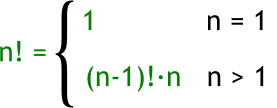

In [85]:
def factorial(n: int) -> int:
    if n == 1:
        return 1 # работа функции закончится
    previous_fact = factorial(n - 1) # рекурсивный вызов
    return previous_fact * n

print(factorial(455))

3306521771441163725950187780664418485367650218559239371160138063548201333399111667747269091685100736462731494619627147203238019141144529986051415275908868350571031324987218411253724845167823103058867860365068451951813882340282571788545187901195487689721583421632040048635901807839354847427777960471612911722135691933887378712823374560182804744188160849288964282071879379493724008307043091587279897291989320894436514978439635843313851046078446411472044006527247748957061163369241377173363753335379378395969176466830588408024591221980805285012148162284328958751527861158896625406093441371917134382570783179448799186202894990962985714011730816431135501429051603122191026351200264516778599336196526114899301479084494492127451527230399687804544607470966766491348634950975801455786506450875218848584045394590046277258190489702473607945869055162687143828558161266519548528450643319367419055086139742155807129600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [88]:
factorial_cache = {1: 1}

def factorial(n: int) -> int:
    if n not in factorial_cache:
        factorial_cache[n] = n * factorial(n - 1)
    return factorial_cache[n]

print(factorial(455))

3306521771441163725950187780664418485367650218559239371160138063548201333399111667747269091685100736462731494619627147203238019141144529986051415275908868350571031324987218411253724845167823103058867860365068451951813882340282571788545187901195487689721583421632040048635901807839354847427777960471612911722135691933887378712823374560182804744188160849288964282071879379493724008307043091587279897291989320894436514978439635843313851046078446411472044006527247748957061163369241377173363753335379378395969176466830588408024591221980805285012148162284328958751527861158896625406093441371917134382570783179448799186202894990962985714011730816431135501429051603122191026351200264516778599336196526114899301479084494492127451527230399687804544607470966766491348634950975801455786506450875218848584045394590046277258190489702473607945869055162687143828558161266519548528450643319367419055086139742155807129600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

## Числа Фибоначчи

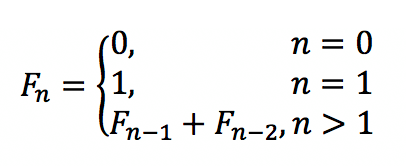

In [93]:
def fibonacci(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(35)

9227465

In [92]:
def fibonacci(n, memo={}):
    if n in memo:
        return memo[n]
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    # Сохраняем результат в словаре
    memo[n] = fibonacci(n - 1, memo) + fibonacci(n - 2, memo)
    return memo[n]

fibonacci(55)

139583862445